In [1]:
import sys
sys.path.append("..")
import splitwavepy as sw

import scipy
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# generate a list of error surfaces
    
listM = [ sw.EigenM(fast=40,lag=2.3,delta=0.1,noise=0.05) for _ in range(16) ]

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


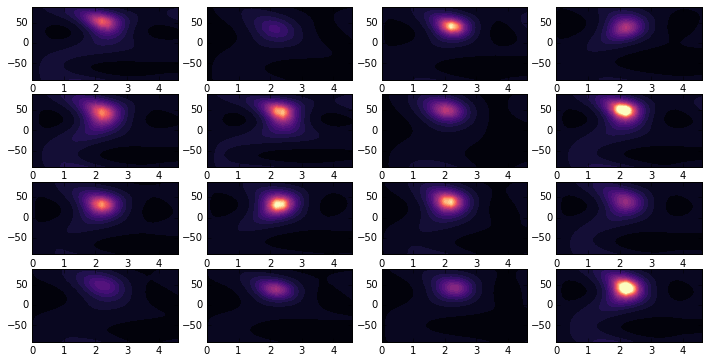

In [69]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(4,4)
v = np.linspace(0, 50, 26, endpoint=True)
for x in range(4):
    for y in range(4):
        ax = plt.subplot(gs[x,y])
        m = listM[4*x+y]
        ax.contourf(m.tlags,m.degs,m.lam1/m.lam2,v,cmap='magma',extend='max')

plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


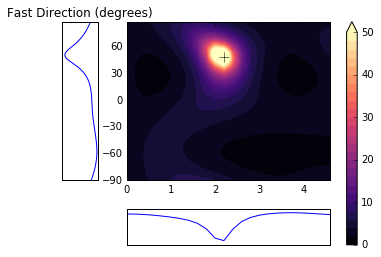

In [73]:
listM[7].plotsurf()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


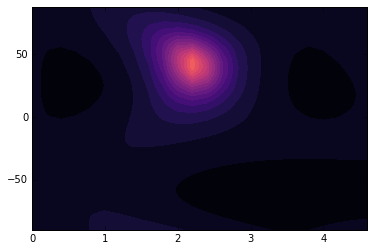

In [71]:
def stackL1L2(listM):
    """
    Stack a list of simple lam1/lam2 surfaces
    """  
    stack = np.zeros(listM[0].degs.shape)
    
    for M in listM:
        stack += (M.lam1 / M.lam2)
        
    return stack / len(listM)

stkL1L2 = stackL1L2(listM)
v = np.linspace(0, 50, 26, endpoint=True)
plt.contourf(listM[0].tlags,listM[0].degs,stkL1L2,v,cmap='magma')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


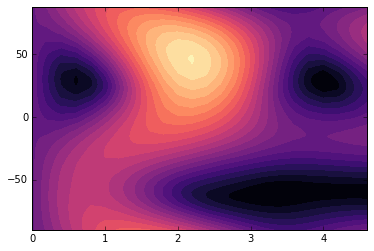

In [23]:
def stackWS(listM):
    """stack Lam2 surfaces,
    following Wolfe and Silver,
    normalize by minlam2"""
    stack = np.zeros(listM[0].degs.shape)
    
    for M in listM:
        stack = stack + (M.lam2/M.lam2.min())
        
    return stack / len(listM)

stkWS = stackWS(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkWS,25,cmap='magma_r')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


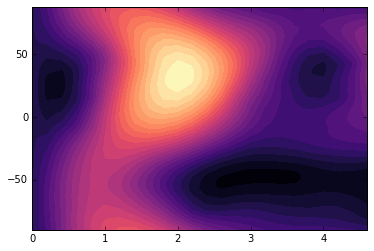

In [19]:
def stackRH(listM):
    """stack Lam2 surfaces,
    following Restivo and Helffrich,
    normalize by minlam2 and weight by SNR"""
    
    stack = np.zeros(listM[0].degs.shape)
    sumwt = 0.
    
    for M in listM:
        stack = stack + M.snrRH * (M.lam2/M.lam2.min())
        sumwt += M.snrRH
    return stack / sumwt

stkRH = stackRH(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkRH,25,cmap='magma_r')
plt.show()    

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


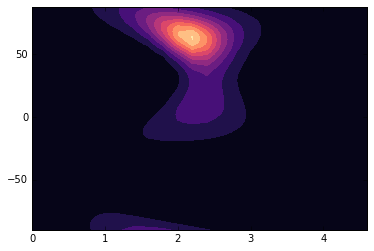

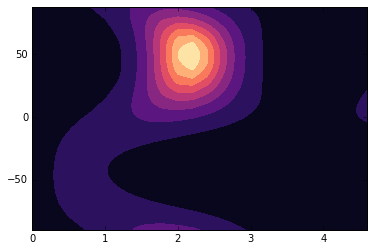

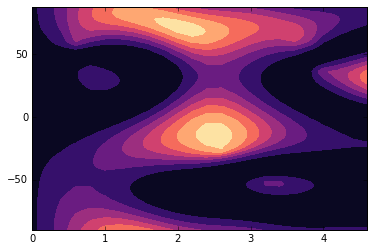

In [29]:
diffsq = (listM[0].lam1/listM[0].lam2 - 
          listM[1].lam1/listM[1].lam2)**2

mult = (listM[0].lam1/listM[0].lam2 * listM[1].lam1/listM[1].lam2)

plt.contourf(listM[0].tlags,listM[0].degs,diffsq,10,cmap='magma')
plt.show()

plt.contourf(listM[0].tlags,listM[0].degs,mult,10,cmap='magma')
plt.show()

plt.contourf(listM[0].tlags,listM[0].degs,diffsq/mult,10,cmap='magma')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


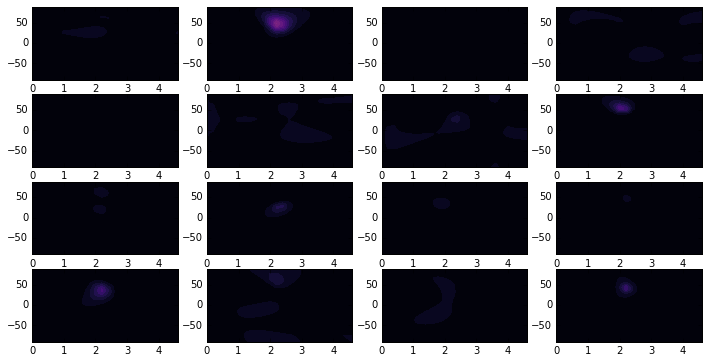

In [78]:
fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(4,4)
# v = np.linspace(0, 50, 26, endpoint=True)
v = np.linspace(0, 5, 26, endpoint=True)
M = stkL1L2
for x in range(4):
    for y in range(4):
        ax = plt.subplot(gs[x,y])
        m = listM[4*x+y]
        vals = m.lam1/m.lam2
        diffsq = (M-vals)**2
        mult = (M * vals)
        ax.contourf(m.tlags,m.degs,diffsq/mult,v,cmap='magma',extend='max')

plt.show()
    

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


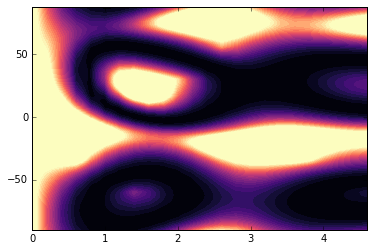

In [91]:
M = sw.EigenM(fast=30,lag=1.4,delta=0.1)
N = sw.EigenM(fast=80,lag=2.2,delta=0.1)

def diff(M,N):
    valsM = M.lam1/M.lam2
    valsN = N.lam1/N.lam2
    return (valsM - valsN)**2

def mult(M,N):
    valsM = M.lam1/M.lam2
    valsN = N.lam1/N.lam2
    return (valsM * valsN)

def dissimilarity(M,N):
    return np.sum(diff(M,N)/mult(M,N))

plt.contourf(m.tlags,m.degs,diff(M,N)/mult(M,N),v,cmap='magma',extend='max')
plt.show()

In [94]:
dissimilarity(N,N)

0.0